In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output, display
%matplotlib inline

In [2]:
df=pd.read_csv('./Itr_6_1.csv').set_index('Wavelength',drop=True).T
x=df.values

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

In [4]:
pca = PCA(n_components=4)
pca2 = PCA(n_components=5)
pca3 = PCA(n_components=6)
principalComponents = pca.fit_transform(scaled_features) #lamda
principalComponents2 = pca2.fit_transform(scaled_features)
principalComponents3 = pca3.fit_transform(scaled_features)

principalDf = pd.DataFrame(data = principalComponents,columns=['pc1','pc2','pc3','pc4'])

In [5]:
print(pca.n_samples_)
print(pca.n_features_)

96
101


In [6]:
pcs = np.array(pca.components_)
df_pc=pd.DataFrame(data = pcs,columns=df.columns)
df_pc.index=[f'Principal component {a}' for a in range(1,5)]
df_pc.style.background_gradient(cmap='bwr_r', axis=None).format("{:.5}")

Wavelength,400,405,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495,500,505,510,515,520,525,530,535,540,545,550,555,560,565,570,575,580,585,590,595,600,605,610,615,620,625,630,635,640,645,650,655,660,665,670,675,680,685,690,695,700,705,710,715,720,725,730,735,740,745,750,755,760,765,770,775,780,785,790,795,800,805,810,815,820,825,830,835,840,845,850,855,860,865,870,875,880,885,890,895,900
Principal component 1,0.077576,0.080319,0.084477,0.089491,0.094392,0.098366,0.10168,0.10405,0.10563,0.1066,0.10718,0.10756,0.10783,0.10809,0.10832,0.1085,0.10861,0.10861,0.10846,0.10816,0.10773,0.10715,0.10649,0.10582,0.1052,0.10475,0.10453,0.10451,0.10466,0.10491,0.10525,0.10561,0.10598,0.10635,0.10668,0.10696,0.10711,0.10711,0.1069,0.10644,0.10576,0.10477,0.10356,0.10218,0.10068,0.099286,0.098108,0.097184,0.096595,0.096379,0.096465,0.096854,0.097476,0.098273,0.099168,0.10012,0.10105,0.10189,0.10268,0.10337,0.1039,0.10432,0.10459,0.10471,0.1047,0.10457,0.10435,0.10403,0.10363,0.10313,0.10257,0.10195,0.10126,0.10054,0.099706,0.09885,0.097958,0.09703,0.096085,0.095098,0.094125,0.093154,0.092193,0.091235,0.090221,0.089552,0.088771,0.08796,0.087294,0.086671,0.086155,0.085724,0.085367,0.085086,0.084867,0.084755,0.084811,0.084703,0.08488,0.085073,0.085308
Principal component 2,0.039262,0.040495,0.042397,0.044468,0.046411,0.04817,0.049433,0.050444,0.051164,0.051937,0.052586,0.05324,0.054113,0.054895,0.055754,0.056668,0.05769,0.058756,0.059926,0.061417,0.063157,0.06542,0.068167,0.071108,0.073992,0.076527,0.078374,0.079816,0.08081,0.081385,0.081542,0.081329,0.080651,0.079377,0.077395,0.074893,0.072106,0.069205,0.066812,0.06538,0.065247,0.066641,0.069691,0.074113,0.07993,0.08627,0.092617,0.098546,0.10365,0.10724,0.10927,0.10921,0.10712,0.10271,0.096221,0.087873,0.077991,0.067025,0.054941,0.042131,0.02923,0.016073,0.0028335,-0.0096499,-0.02186,-0.033974,-0.044997,-0.055398,-0.065283,-0.074861,-0.083644,-0.092143,-0.099944,-0.10713,-0.11415,-0.12044,-0.12621,-0.13151,-0.13629,-0.14069,-0.14455,-0.148,-0.15105,-0.15375,-0.15628,-0.15781,-0.15935,-0.16077,-0.16173,-0.16257,-0.16304,-0.16325,-0.16336,-0.16321,-0.16294,-0.16242,-0.16142,-0.16125,-0.15988,-0.15852,-0.15723
Principal component 3,0.32056,0.31123,0.29535,0.27356,0.24814,0.22305,0.19793,0.17609,0.15853,0.14552,0.13641,0.12912,0.12238,0.11489,0.10623,0.096232,0.08407,0.071773,0.058167,0.047018,0.036779,0.0287,0.023031,0.019001,0.015868,0.012956,0.010212,0.0069507,0.0029502,-0.0015098,-0.0062858,-0.011698,-0.017229,-0.022925,-0.028551,-0.034006,-0.039191,-0.04408,-0.048987,-0.053873,-0.058443,-0.063429,-0.068487,-0.073833,-0.079592,-0.085209,-0.090801,-0.096464,-0.10178,-0.10645,-0.11108,-0.11504,-0.11805,-0.12048,-0.1218,-0.12183,-0.12102,-0.11936,-0.11644,-0.11282,-0.10857,-0.10338,-0.097749,-0.092099,-0.086165,-0.08004,-0.073986,-0.068187,-0.062294,-0.056439,-0.051015,-0.045485,-0.040372,-0.035612,-0.030811,-0.026459,-0.022285,-0.018545,-0.014913,-0.011732,-0.0086511,-0.005786,-0.0033094,-0.0010985,0.0015004,0.0025383,0.0041225,0.0059999,0.0071689,0.0084069,0.0092201,0.010168,0.011046,0.01159,0.012297,0.013218,0.013669,0.013101,0.013878,0.014189,0.014173
Principal component 4,-0.097582,-0.093382,-0.086352,-0.076644,-0.065934,-0.055573,-0.045462,-0.036659,-0.030084,-0.024498,-0.020671,-0.017555,-0.014373,-0.011013,-0.0073702,-0.0029235,0.0022937,0.0073611,0.013132,0.018621,0.024921,0.03125,0.038442,0.04513,0.052062,0.058558,0.063812,0.068691,0.072999,0.076013,0.078252,0.079274,0.079526,0.07872,0.078046,0.077942,0.079081,0.082623,0.088388,0.096574,0.10596,0.11651,0.12634,0.13419,0.13789,0.13711,0.13102,0.11987,0.10355,0.083209,0.058365,0.030946,0.001412,-0.02889,-0.059258,-0.087898,-0.11398,-0.13659,-0.15619,-0.17208,-0.18396,-0.19237,-0.19725,-0.19893,-0.19785,-0.19387,-0.18799,-0.18041,-0.17115,-0.16047,-0.14898,-0.13599,-0.1227,-0.10869,-0.093899,-0.07937,-0.064694,-0.049933,-0.035584,-0.021183,-0.007734,0.0057067,0.018184,0.030464,0.043315,0.050952,0.060834,0.070746,0.0

In [7]:
print(f"PCA=4 proportion of variance explained: {pca.explained_variance_}\nRatio: {pca.explained_variance_ratio_.sum()}\n")
print(f"PCA=5 proportion of variance explained: {pca2.explained_variance_}\nRatio: {pca2.explained_variance_ratio_.sum()}\n")
print(f"PCA=6 proportion of variance explained: {pca3.explained_variance_}\nRatio: {pca3.explained_variance_ratio_.sum()}")

PCA=4 proportion of variance explained: [77.48670606 15.18150378  4.09031355  3.08772491]
Ratio: 0.9782790417332313

PCA=5 proportion of variance explained: [77.48670606 15.18150378  4.09031355  3.08772491  1.48368962]
Ratio: 0.9928160171950792

PCA=6 proportion of variance explained: [77.48670606 15.18150378  4.09031355  3.08772491  1.48368962  0.51232164]
Ratio: 0.9978356702601369


In [8]:
pca.explained_variance_ratio_

array([0.75920349, 0.14874617, 0.0400763 , 0.03025308])

In [9]:
pc = []
for i in range(1,5):
    pc.append(df_pc.loc[f'Principal component {i}'].values)

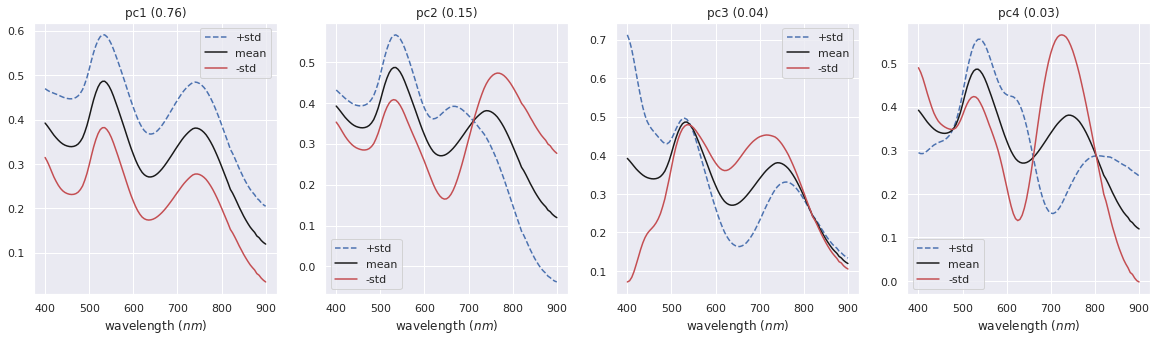

In [10]:
sns.set_theme()
fig,ax=plt.subplots(1,4,figsize=(20,5))
col=['r','k','b']
for i in range(4):
    ax[i].plot(df_pc.columns, df.mean().values+pc[i], label='+std', c=col[2], ls='--' )
    ax[i].plot(df_pc.columns, df.mean().values, label='mean', c=col[1])
    ax[i].plot(df_pc.columns, df.mean().values-pc[i], label='-std', c=col[0])
    ax[i].set_title(f'pc{i+1} ({pca.explained_variance_ratio_[i].round(2)})')
    ax[i].set_xlabel('wavelength $(nm)$',fontsize='12');
    ax[i].legend()

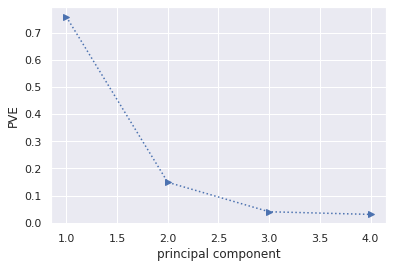

In [11]:
plt.plot([1,2,3,4], pca.explained_variance_ratio_,':>')
plt.xlabel('principal component')
plt.ylabel('PVE')
plt.show()